# Studies on the Hinton paper

In [2]:
import numpy as np

def create_blob_dataset(n_per_cluster, n_clusters, p):
    c1 = np.zeros((n_per_cluster*n_clusters, p))
    for i in range(n_clusters):
        start = i * n_per_cluster
        end = (i + 1) * n_per_cluster
        c1[start:end, :] = 3*np.random.randn(1, p)
    return np.random.randn(n_per_cluster*n_clusters, p) + c1

X1 = create_blob_dataset(100, 5, 30)
X2 = create_blob_dataset(100, 5, 70)
X3 = np.random.randn(500,50)
X4 = create_blob_dataset(250, 2, 30)

test_cases = [X1, X2, X3, X4]

In [3]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot PCA projection of X1
pca = PCA(n_components=2)
X1_pca = pca.fit_transform(X1)
ax1.scatter(X1_pca[:, 0], X1_pca[:, 1])
ax1.set_title('PCA Projection of X1')

# Plot PCA projection of X2
pca = PCA(n_components=2)
X2_pca = pca.fit_transform(X2)
ax2.scatter(X2_pca[:, 0], X2_pca[:, 1])
ax2.set_title('PCA Projection of X2')

plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def error_linear_regression(X1, X2):
    # Create the linear regression model
    regression_model = LinearRegression()

    # Fit the model using X1 as the independent variable and X2 as the dependent variable
    regression_model.fit(X1, X2)

    # Predict X2 values using the linear regression model
    X2_predicted = regression_model.predict(X1)

    # Calculate the mean squared error
    mse = mean_squared_error(X2, X2_predicted)
    return mse



In [5]:
def cka(X1, X2):
    # Center the data
    X1 = X1 - X1.mean(axis=0)
    X2 = X2 - X2.mean(axis=0)

    # Compute the kernel matrices
    K1 = X1.T @ X1
    K2 = X2.T @ X2

    # Compute the squared Frobenius norms
    norm1 = np.linalg.norm(K1, 'fro')
    norm2 = np.linalg.norm(K2, 'fro')

    # Compute the CKA
    cka = np.linalg.norm(X2.T @ X1, 'fro')**2 / (norm1 * norm2)
    return cka



In [6]:
import graph_structure as gs 
import itertools
from tqdm import tqdm

n_cases = list(range(len(test_cases)))
for case in itertools.product(n_cases, n_cases):
    print("----Case: ", case)
    # Perform operations on each case
    mse = error_linear_regression(test_cases[case[0]], test_cases[case[1]])
    print(f"Mean Squared Error for {case[0]}, {case[1]}: {mse}")
    cka_similarity = cka(test_cases[case[0]], test_cases[case[1]])
    print(f"CKA Similarity for {case[0]}, {case[1]}: {cka_similarity}")
    gs_similarity = gs.mean_neighborhood_similarity_from_points(test_cases[case[0]], test_cases[case[1]], k=100)
    print(f"Graph Similarity for {case[0]}, {case[1]}: {gs_similarity}")

# A toy problem

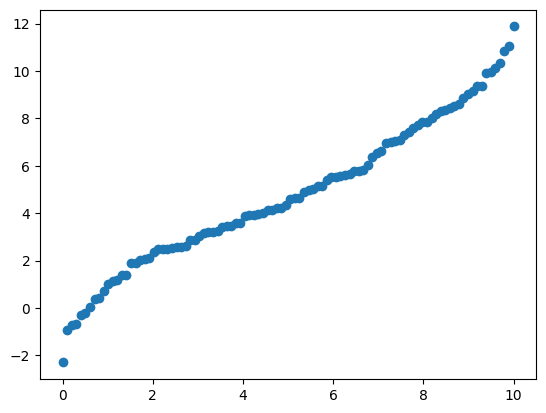

In [24]:
import numpy as np

# Create a unidimensional dataset with 50 evenly spaced points
dataset = np.linspace(0, 10, 100)
dataset2 = dataset + np.random.normal(0, 1.7, 100)
dataset2 = np.sort(dataset2)
dataset = dataset.reshape((-1, 1))
dataset2 = dataset2.reshape((-1, 1))
# Plot the dataset
plt.scatter(dataset, dataset2)

In [27]:
mse = error_linear_regression(dataset, dataset2)
print(f"Mean Squared Error: {mse}")
cka_similarity = cka(dataset, dataset2)
print(f"CKA Similarity: {cka_similarity}")
gs_similarity = gs.mean_neighborhood_similarity_from_points(dataset, dataset2, k=20)
print(f"Graph Similarity: {gs_similarity}")


Mean Squared Error: 0.21893768002045955
CKA Similarity: 0.9770919635919625
Graph Similarity: 0.9608888888888888
